### 1. ****Import Libraries****

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.20.0


### 2. ****Dataset Paths****

In [2]:
DATA_DIR = "../data/processed"

IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 10


### 3. ****Train & Validation Generators****

In [3]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)


Found 2464 images belonging to 7 classes.
Found 612 images belonging to 7 classes.


### 4. ****Build CNN Model****

In [4]:
model = Sequential([
    
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    
    Dense(128, activation='relu'),
    Dropout(0.5),
    
    Dense(train_gen.num_classes, activation='softmax')
])

model.summary()


c:\Users\Damod\anaconda3\envs\crop_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,863 (42.61 MB)

 Trainable params: 11,169,863 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

### 5. ****Compile Model****

In [5]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Model compiled successfully!")


Model compiled successfully!


### 6. ****Train Model****

In [6]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)


c:\Users\Damod\anaconda3\envs\crop_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 548s 7s/step - accuracy: 0.2272 - loss: 2.3737 - val_accuracy: 0.2353 - val_loss: 1.7727
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 332s 4s/step - accuracy: 0.2906 - loss: 1.7093 - val_accuracy: 0.2990 - val_loss: 1.7471
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 298s 4s/step - accuracy: 0.3566 - loss: 1.5798 - val_accuracy: 0.3186 - val_loss: 1.6849
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 312s 4s/step - accuracy: 0.4253 - loss: 1.4047 - val_accuracy: 0.3366 - val_loss: 1.7241
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 306s 4s/step - accuracy: 0.4593 - loss: 1.3448 - val_accuracy: 0.3546 - val_loss: 1.7783
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 352s 4s/step - accuracy: 0.5203 - loss: 1.2118 - val_accuracy: 0.3464 - val_loss: 1.7776
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 310s 4s/step - accuracy: 0.5581 - loss: 1.1010 - val_accuracy: 0.2974 - val_loss: 2.2594
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 349s 4s/step - accuracy: 0.6156 - loss: 1.0137 - val_accuracy: 0.3301 - v

### 7. ****Plot Accuracy & Loss****

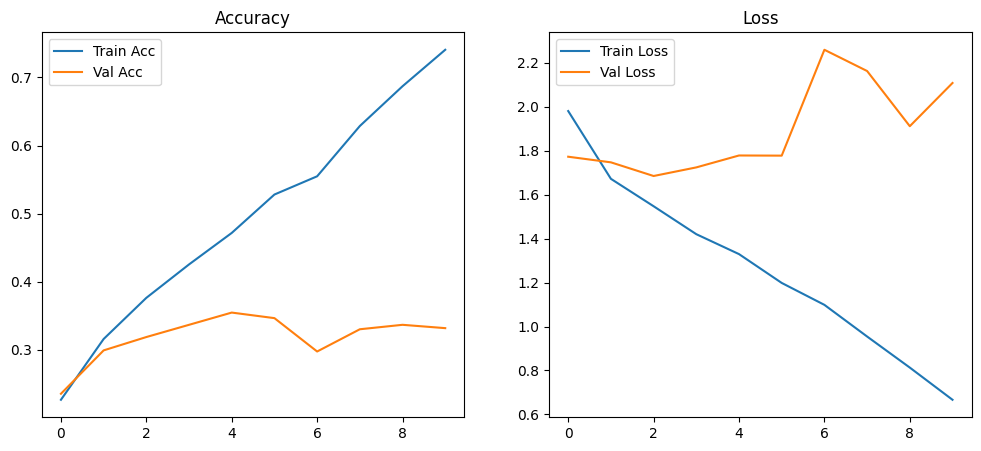

In [8]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()

plt.show()


### 8. ****Save Model****

In [9]:
model.save("../models/cnn_model.h5")
print("CNN model saved successfully!")


CNN model saved successfully!
